# Decision Trees

* Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression
* The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features

## Pros

* Simple to understand and to interpret. Trees can be visualised
* Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values
* The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree
* Able to handle both numerical and categorical data. Other techniques are usually specialised in analysing datasets that have only one type of variable. See algorithms for more information
* Able to handle multi-output problems
* Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret
* Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model
* Performs well even if its assumptions are somewhat violated by the true model from which the data were generated

## Cons

* Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting
    - Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
* There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems
* Decision tree learners create biased trees if some classes dominate
    - It is therefore recommended to balance the dataset prior to fitting with the decision tree

### Reasons motivating Random Forest

* Decision trees can be unstable because small variations in the data might result in a completely different tree being generated
    - This problem is mitigated by using decision trees within an ensemble.
* The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts
    - Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node
    - Such algorithms cannot guarantee to return the globally optimal decision tree
    - This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement

## Example

### Regression

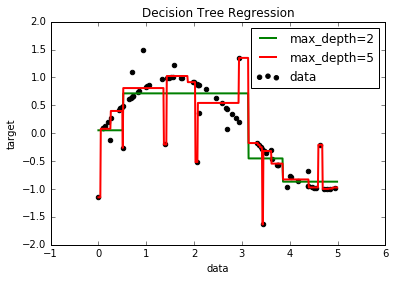

In [62]:
%matplotlib inline
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

plt.figure()
plt.scatter(X, y, c="k", label="data")
plt.plot(X_test, y_1, c="g", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, c="r", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Classification

In [97]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

Note: We are using graphviz to visualise the Decision Trees - http://www.graphviz.org/Download..php

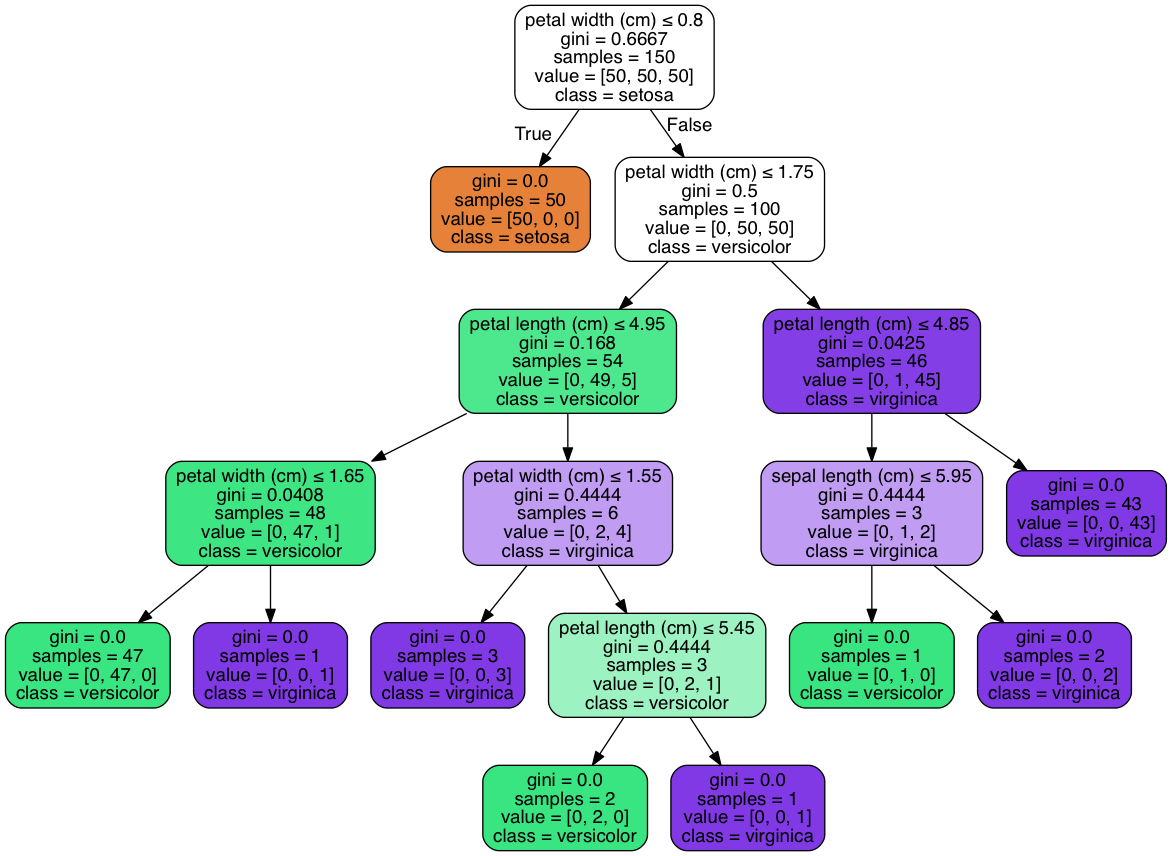

In [98]:
from IPython.display import Image  
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Interpreting the Tree

* Imagine that all data (all rows) start in a single bin at the top of the tree.
* All features are considered to see how the data can be split in the most informative way
    - this uses the gini measure by default, but this can be changed to entropy if you prefer
* At the top we see the most informative condition (petal_length <= 2.45)
    - If this condition is true, take the left branch to get to 50 samples
        * No further split. This means there are 50 examples of class/target 0, in this case Iris-setosa
    - The other 100 samples, of the 150 total, go to the right bin
* This splitting continues until 
    - the split creates a bin with only one class - for example the bin with 50 Iris-setosa is not split again, or
    - the resulting bin has less than 2 samples– this is because we set the min_samples_split=2 (default value) when initializing the decision tree. If we had not set this value, the tree would keep splitting until all bins have a single class.

### Training with less rows

In [37]:
from sklearn.datasets import load_iris
import numpy as np

np.shape(load_iris().data)

(150, 4)

In [42]:
iris = load_iris()
iris.data = iris.data[:140,:]
iris.target = iris.target[:140]

print(np.shape(iris.data), np.shape(iris.target))

(140, 4) (140,)


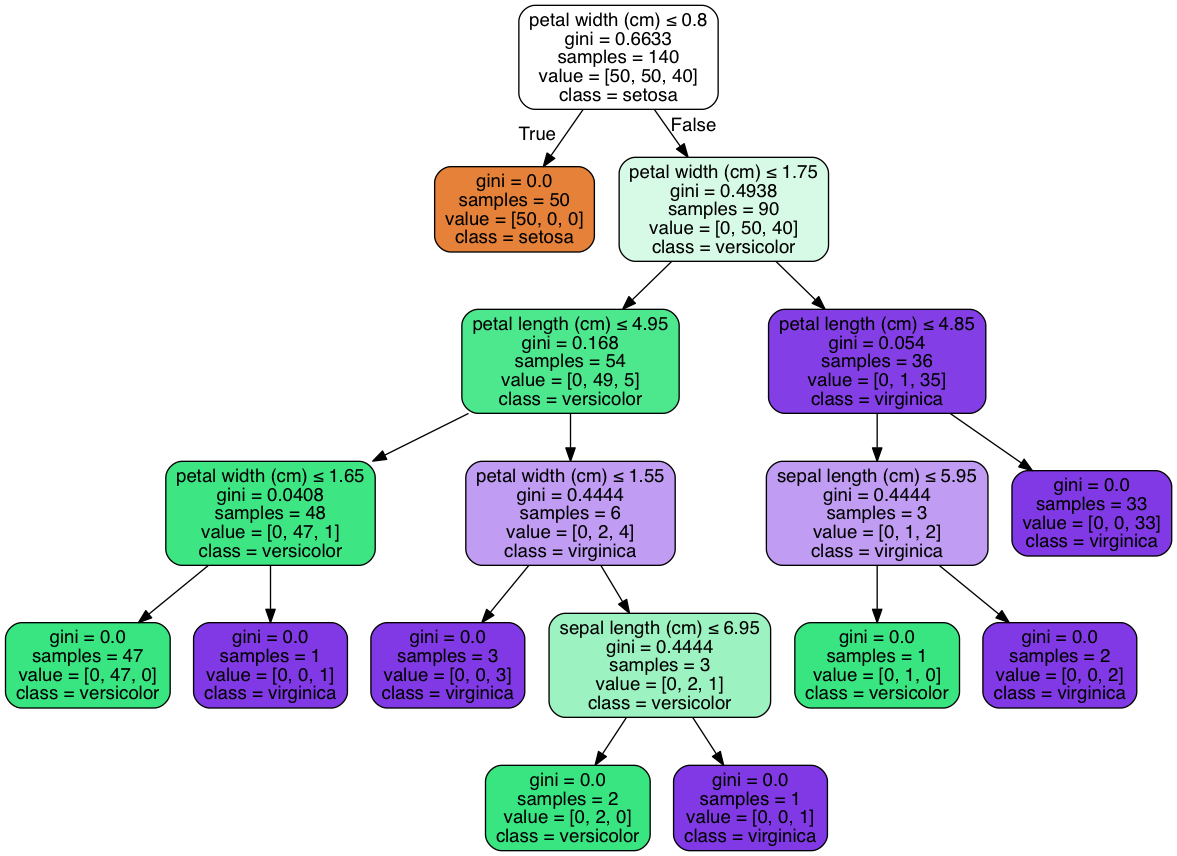

In [49]:
from sklearn.datasets import load_iris
from sklearn import tree
from IPython.display import Image
import numpy as np

sizevar = 140
iris = load_iris()
clf = tree.DecisionTreeClassifier(random_state=1)
clf = clf.fit(iris.data[:sizevar,:], iris.target[:sizevar])

dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data, feature_names=iris.feature_names, 
                     class_names=iris.target_names, 
                     filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

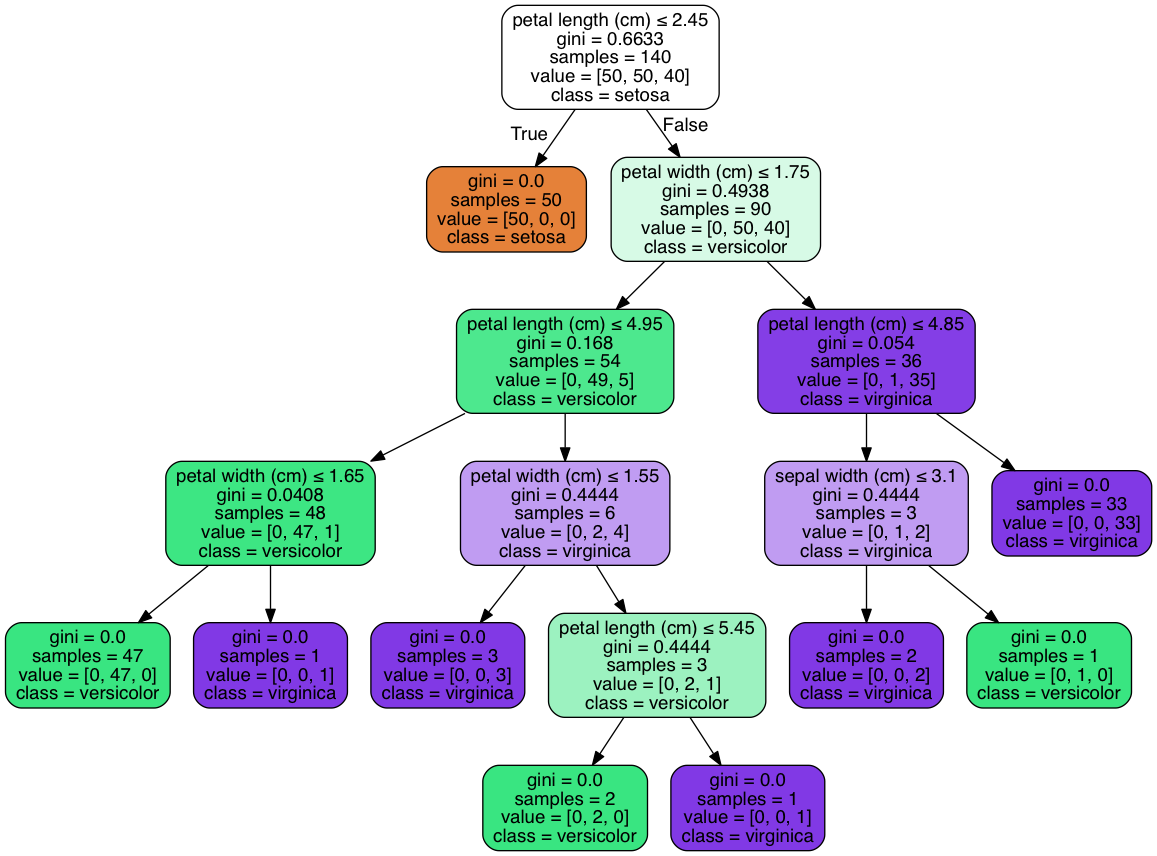

In [53]:
from sklearn.datasets import load_iris
from sklearn import tree
from IPython.display import Image
import numpy as np

sizevar = 140
iris = load_iris()
clf = tree.DecisionTreeClassifier(random_state=300)
clf = clf.fit(iris.data[:sizevar,:], iris.target[:sizevar])

dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data, feature_names=iris.feature_names, 
                     class_names=iris.target_names, 
                     filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

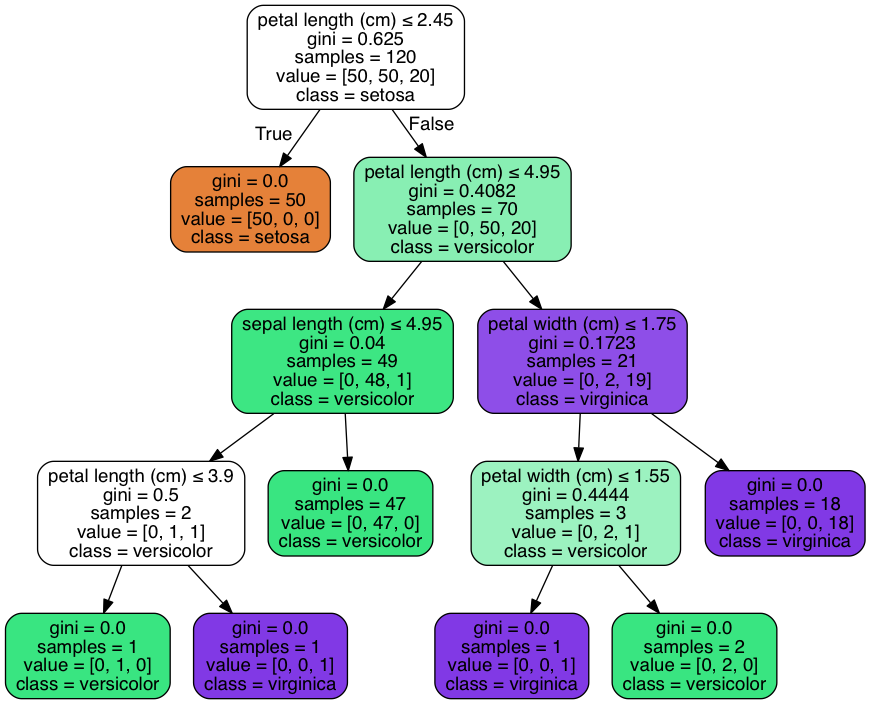

In [79]:
from sklearn.datasets import load_iris
from sklearn import tree
from IPython.display import Image
import numpy as np

sizevar = 120
iris = load_iris()
clf = tree.DecisionTreeClassifier(random_state=300)
clf = clf.fit(iris.data[:sizevar,:], iris.target[:sizevar])

dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data, feature_names=iris.feature_names, class_names=iris.target_names, 
                     filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

### Training with less column

Predict what will happen

### Prediction

In [56]:
clf.predict(iris.data[:1, :])

array([0])

Alternatively, the probability of each class can be predicted, which is the fraction of training samples of the same class in a leaf:

In [60]:
clf.predict_proba(iris.data[:1, :])

array([[ 1.,  0.,  0.]])

## Practical Use

### Hyper-parameter Tuning
* Decision trees tend to overfit on data with a large number of features
    - Getting the right ratio of samples to number of features is important, since a tree with few samples in high dimensional space is very likely to overfit.
    - Consider performing dimensionality reduction (PCA, ICA, or Feature selection) beforehand to give your tree a better chance of finding features that are discriminative
* Visualise your tree as you are training by using the export function
    - Use max_depth=3 as an initial tree depth to get a feel for how the tree is fitting to your data, and then increase the depth
* Remember that the number of samples required to populate the tree doubles for each additional level the tree grows to
    - Use max_depth to control the size of the tree to prevent overfitting
* Use min_samples_split or min_samples_leaf to control the number of samples at a leaf node
    - A very small number will usually mean the tree will overfit, whereas a large number will prevent the tree from learning the data
    - Try min_samples_leaf=5 as an initial value
    - The main difference between the two is that min_samples_leaf guarantees a minimum number of samples in a leaf, while min_samples_split can create arbitrary small leaves, though min_samples_split is more common in the literature

### Class Imbalance and Weights
* Balance your dataset before training to prevent the tree from being biased toward the classes that are dominant
    - Class balancing can be done by sampling an equal number of samples from each class, or preferably by normalizing the sum of the sample weights (sample_weight) for each class to the same value
    - Also note that weight-based pre-pruning criteria, such as min_weight_fraction_leaf, will then be less biased toward dominant classes than criteria that are not aware of the sample weights, like min_samples_leaf
* If the samples are weighted, it will be easier to optimize the tree structure using weight-based pre-pruning criterion such as min_weight_fraction_leaf, which ensure that leaf nodes contain at least a fraction of the overall sum of the sample weights.

### Sparse Matrix
* If the input matrix X is very sparse, it is recommended to convert to 
    - sparse csc_matrix before calling fit(), and 
    - sparse csr_matrix before calling predict()
* Training time can be orders of magnitude faster for a sparse matrix input compared to a dense matrix when features have zero values in most of the samples.

## Example 1: Effect of Increasing max_depth

### Depth 2 and 5, size 80

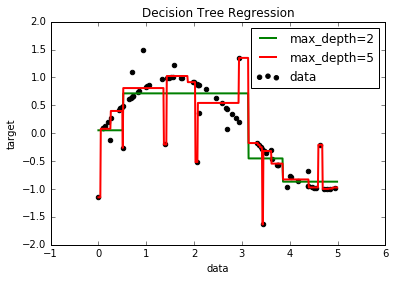

In [84]:
%matplotlib inline
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

plt.figure()
plt.scatter(X, y, c="k", label="data")
plt.plot(X_test, y_1, c="g", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, c="r", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Depth 2 and 5, size 800

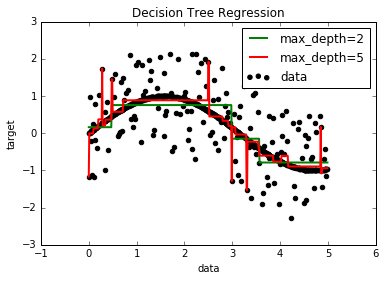

In [85]:
%matplotlib inline
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(800, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(160))

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

plt.figure()
plt.scatter(X, y, c="k", label="data")
plt.plot(X_test, y_1, c="g", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, c="r", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Depth 2 and 3, size 800

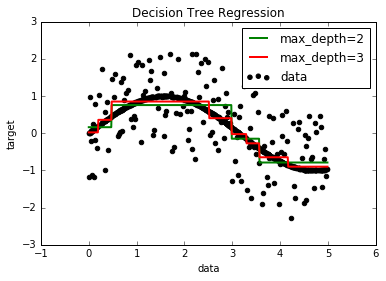

In [86]:
%matplotlib inline
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(800, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(160))

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=3)
regr_1.fit(X, y)
regr_2.fit(X, y)

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

plt.figure()
plt.scatter(X, y, c="k", label="data")
plt.plot(X_test, y_1, c="g", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, c="r", label="max_depth=3", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Depth None, 3, 5 and 10, decision boundary

DecisionTree with features [0, 1] and depth None has a score of 0.926666666667
DecisionTree with features [0, 1] and depth 3 has a score of 0.813333333333
DecisionTree with features [0, 1] and depth 5 has a score of 0.846666666667
DecisionTree with features [0, 1] and depth 10 has a score of 0.913333333333
DecisionTree with features [0, 2] and depth None has a score of 0.993333333333
DecisionTree with features [0, 2] and depth 3 has a score of 0.953333333333
DecisionTree with features [0, 2] and depth 5 has a score of 0.986666666667
DecisionTree with features [0, 2] and depth 10 has a score of 0.993333333333
DecisionTree with features [2, 3] and depth None has a score of 0.993333333333
DecisionTree with features [2, 3] and depth 3 has a score of 0.973333333333
DecisionTree with features [2, 3] and depth 5 has a score of 0.993333333333
DecisionTree with features [2, 3] and depth 10 has a score of 0.993333333333


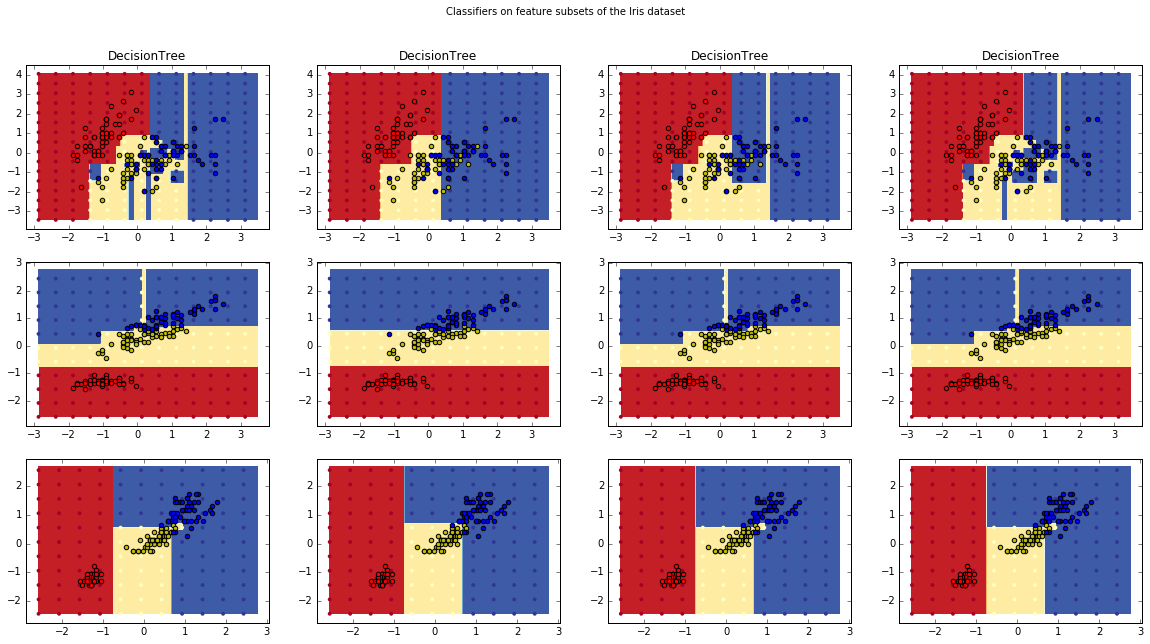

In [96]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

from sklearn import clone
from sklearn.datasets import load_iris
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
from sklearn.externals.six.moves import xrange
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
n_estimators = 30
plot_colors = "ryb"
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration

# Load data
iris = load_iris()

plot_idx = 1

models = [DecisionTreeClassifier(max_depth=None),
          DecisionTreeClassifier(max_depth=3),
          DecisionTreeClassifier(max_depth=5),
          DecisionTreeClassifier(max_depth=10)]

for pair in ([0, 1], [0, 2], [2, 3]):
    for model in models:
        # We only take the two corresponding features
        X = iris.data[:, pair]
        y = iris.target

        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        # Train
        clf = clone(model)
        clf = model.fit(X, y)

        scores = clf.score(X, y)
        # Create a title for each column and the console by using str() and
        # slicing away useless parts of the string
        model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]
        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(len(model.estimators_))
        print( model_details + " with features", pair, "and depth", model.max_depth, "has a score of", scores )

        plt.subplot(3, 4, plot_idx)
        if plot_idx <= len(models):
            # Add a title at the top of each column
            plt.title(model_title)

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        # Plot either a single DecisionTreeClassifier or alpha blend the
        # decision surfaces of the ensemble of classifiers
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            # Choose alpha blend level with respect to the number of estimators
            # that are in use (noting that AdaBoost can use fewer estimators
            # than its maximum if it achieves a good enough fit early on)
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        # Build a coarser grid to plot a set of ensemble classifications
        # to show how these are different to what we see in the decision
        # surfaces. These points are regularly space and do not have a black outline
        xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                             np.arange(y_min, y_max, plot_step_coarser))
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(), yy_coarser.ravel()]).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser, yy_coarser, s=15, c=Z_points_coarser, cmap=cmap, edgecolors="none")

        # Plot the training points, these are clustered together and have a
        # black outline
        for i, c in zip(xrange(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i],
                        cmap=cmap)

        plot_idx += 1  # move on to the next plot in sequence

plt.suptitle("Classifiers on feature subsets of the Iris dataset")
plt.axis("tight")

plt.show()

# Random Forests

## Bootstrap Aggregating (Bagging)

## Subspace Sampling

## Extra Trees

# In sklearn

    sklearn.ensemble.RandomForestRegressor(
        n_estimators=10, 
        criterion='mse',
        max_depth=None, 
        min_samples_split=2, 
        min_samples_leaf=1, 
        max_features='auto', 
        max_leaf_nodes=None, 
        bootstrap=True, 
        oob_score=False, 
        n_jobs=1,
        random_state=None, 
        verbose=0, 
        min_density=None, 
        compute_importances=None)

Important hyper-parameters
* Number of Trees
* Depth of Trees
* Sampling
* Splitting

## n_estimators

**integer, optional (default = 10)**

* This is the number of trees in the ensemble
* The default is okay to use if you coded things correctly, but you’ll generally want more than 10 trees to gain the best performance
* You can experiment with the number and get a feel for how many are required
* The appropriate model complexity (tree depth and number of trees) depends on the complexity of the underlying problem and the amount of data that you have
* A good starting point is 100–500

## max_depth

**integer or None, optional (default=None)**

* If this parameter is set to None, the tree will be grown until all the leaf nodes are
    - either pure or 
    - they hold fewer than min_samples_split examples
* As an alternative to specifying the tree depth, you can use max_leaf_nodes to specify the number of leaf nodes in the tree
    - If you specify max_leaf_nodes, max_depth is ignored
* There might be a performance advantage to leaving max_depth set to auto and growing full-depth trees
    - But this is also a training time cost associated with full-depth trees

## min_samples_split

**integer, optional (default=2)**

* Nodes will not be split that have fewer than min_samples_split examples
* Splitting nodes that are small is a source of overfitting

## min_samples_leaf

**integer, optional (default=1)**

* A split is not taken if the split leads to nodes that have fewer than min_samples_leaf
* The default value for this parameter results in the parameter being ignored, which is often okay - particularly when you’re making the first few training runs on your data set
* You can think about selecting a meaningful value for this parameter in a couple of ways
    - One is that the value assigned to a leaf is the average of the examples in the leaf and that you’ll get a lower variance average if there’s more than one sample in the leaf node
    - Another way to think about this parameter is as an alternative way to control tree depth

## max_features

**integer, float or string, optional (default=None)**

The number of features to consider when looking for the best split depends on the value set for max_features and on the number of features in the problem. Call the number of features in the problem nFeatures. Then:

* If the type of max_features is int, consider max_features features at each split. Note: max_features gt; nFeatures throws an error
* If the type of max_features is float, max_features is the fraction of features to consider: int(max_features * nFeatures)
* Possible string values include the following:
    - *auto* max_features=nFeatures
    - *sqrt* max_features=sqrt(nFeatures)
    - *log2* max_features=log2(nFeatures)
* If max_features=None, then max_features=nFeatures.

Brieman and Cutler recommend sqrt(nFeatures) for regression problems. The answers aren’t generally terribly sensitive to max_features, but this parameter can have some effect, so you’ll want to test a few alternative values.

## random_state

**int, RandomState instance, or None (default=None)**

* If the type is integer, the integer is used as the seed for the random number generator
* If the random_state is an instance of RandomState, that instance is used as the random number generator
* If random_state is None, the random number generator is the instance of RandomState used by numpy.random

# Computing Feature Importance

In [100]:
# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

# load the iris datasets
dataset = datasets.load_iris()

# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(dataset.data, dataset.target)

# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.08979441  0.05095686  0.42061655  0.43863218]


In [102]:
# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

# load the iris datasets
dataset = datasets.load_iris()

# fit an Extra Trees model to the data
model = RandomForestClassifier()
model.fit(dataset.data, dataset.target)

# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.06112445  0.02057278  0.49466698  0.42363578]
